In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from predict_test_data import predict_test_data
from sklearn.preprocessing import StandardScaler

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

C:\Users\shengsiong\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train = pd.read_csv('../data/cleaned/train_final.csv')
test = pd.read_csv('../data/cleaned/test_final.csv')

In [3]:
train.head()

,game_date,home_team,away_team,home_score,away_score,tournament,country,neutral,overall_diff,attack_away_defence_home_diff,...,wins_past_1_games_diff,wins_home_against_away_4_games,score_past_1_games_diff,wins_past_3_games_diff,score_conceded_past_4_games_diff,score_conceded_past_5_games_diff,score_past_2_games_diff,wins_home_against_away_2_games,score_conceded_past_3_games_diff,score_conceded_past_2_games_diff
0,2006-09-01 00:00:00+00:00,Denmark,Portugal,4,2,Friendly,Denmark,False,-3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2006-09-02 00:00:00+00:00,Romania,Bulgaria,2,2,UEFA Euro qualification,Romania,False,-1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006-09-02 00:00:00+00:00,Poland,Finland,1,3,UEFA Euro qualification,Poland,False,-0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2006-09-02 00:00:00+00:00,Hungary,Norway,1,4,UEFA Euro qualification,Hungary,False,-7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2006-09-02 00:00:00+00:00,Germany,Ireland,1,0,UEFA Euro qualification,Germany,False,8.0,-8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train.columns

Index(['game_date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral', 'overall_diff',
       'attack_away_defence_home_diff', 'attack_diff',
       'attack_home_defence_away_diff', 'defence_diff', 'midfield_diff',
       'rank_diff', 'prestige_diff', 'growth_diff', 'full_age_diff',
       'start_age_diff', 'value_euros_millions_diff',
       'wage_euros_thousands_diff', 'goalkeeper_overall_diff',
       'bup_dribbling_diff', 'bup_passing_diff', 'bup_speed_diff',
       'cc_crossing_diff', 'cc_passing_diff', 'cc_shooting_diff',
       'd_aggresion_diff', 'd_pressure_diff', 'd_width_diff', 'home_win',
       'gdp_diff', 'is_home', 'raw_gdp_diff', 'score_past_3_games_diff',
       'wins_past_5_games_diff', 'wins_home_against_away_3_games',
       'score_past_4_games_diff', 'wins_home_against_away_1_games',
       'score_past_5_games_diff', 'score_conceded_past_1_games_diff',
       'wins_past_4_games_diff', 'wins_past_2_games_diff',
       'w

## Advanced Model

For the advanced model, let us start by looking at the correlation matrix of all our predictors. We see that some of the predictors are highly correlated which can be an issue subsequently. We should do a simple feature selection by using LASSO with Logistic Regression

In [5]:
cor_mat = train.corr()

In [6]:
columns = ['overall_diff', 'attack_away_defence_home_diff', 'attack_home_defence_away_diff',
           'attack_diff', 'defence_diff', 'midfield_diff', 'prestige_diff', 'growth_diff', 
           'full_age_diff', 'start_age_diff', 'value_euros_millions_diff','wage_euros_thousands_diff', 
           'goalkeeper_overall_diff', 'bup_dribbling_diff', 'bup_passing_diff', 'bup_speed_diff',
           'cc_crossing_diff', 'cc_passing_diff', 'cc_shooting_diff', 'd_aggresion_diff', 'd_pressure_diff', 
           'd_width_diff', 'gdp_diff', 'is_home', 'raw_gdp_diff',
          'score_past_5_games_diff', 'score_conceded_past_5_games_diff']


In [7]:
train = train[columns + ['home_win']]
test = test[columns + ['Group', 'home_win']]

## Feature Selection with LASSO

In [13]:
X = train.drop(['home_win', 'game_date', 'home_team', 
                'away_team', 'home_score', 'away_score',
                'tournament', 'country', 'neutral'], axis=1)
y = train['home_win']

columns_full = X.columns.values

In [343]:
# fit lasso with logistic
#lasso_mod = LogisticRegressionCV(solver = 'saga',
#                                 cv = 5,
#                                 max_iter = 5000, 
#                                 multi_class='multinomial',
#                                 penalty='l1').fit(X, y)

In [344]:
#var_id = [i for i, val in enumerate(np.sum(lasso_mod.coef_, axis=0)) if val > 0]
#columns_lasso = columns_full[var_id].tolist()

In [345]:
#columns_lasso

['overall_diff',
 'attack_away_defence_home_diff',
 'attack_diff',
 'attack_home_defence_away_diff',
 'defence_diff',
 'midfield_diff',
 'prestige_diff',
 'value_euros_millions_diff',
 'wage_euros_thousands_diff',
 'bup_passing_diff',
 'bup_speed_diff',
 'cc_passing_diff',
 'cc_shooting_diff',
 'd_aggresion_diff',
 'd_pressure_diff',
 'is_home']

In [153]:
#train = train[columns_lasso + ['home_win']]
#test = test[columns_lasso + ['Group', 'home_win']]

## Feature Selection with SelectKBest

In [292]:
#from sklearn.feature_selection import SelectKBest, f_classif

#selectkbest = SelectKBest(f_classif, k=25).fit(X,y)
#columns_selectkbest = columns_full[selectkbest.get_support(indices=True)].tolist()

In [293]:
#columns_selectkbest

['overall_diff',
 'attack_away_defence_home_diff',
 'attack_diff',
 'attack_home_defence_away_diff',
 'defence_diff',
 'midfield_diff',
 'rank_diff',
 'prestige_diff',
 'growth_diff',
 'value_euros_millions_diff',
 'wage_euros_thousands_diff',
 'goalkeeper_overall_diff',
 'bup_passing_diff',
 'bup_speed_diff',
 'cc_shooting_diff',
 'd_aggresion_diff',
 'd_pressure_diff',
 'd_width_diff',
 'gdp_diff',
 'is_home',
 'score_conceded_past_1_games_diff',
 'score_conceded_past_4_games_diff',
 'score_conceded_past_5_games_diff',
 'score_conceded_past_3_games_diff',
 'score_conceded_past_2_games_diff']

In [294]:
#train = train[columns_selectkbest + ['home_win']]
#test = test[columns_selectkbest  + ['Group', 'home_win']]

## Feature Selection with RFECV

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selectrfcev = RFECV(estimator, step=1, cv=5)
selectrfcev = selector.fit(X, y)
selectrfcev.support_ 

In [ ]:
selectrfcev = selector

In [ ]:
columns_rfecv = columns_full[selectrfcev.get_support(indices=True)].tolist()

## Feature Selection with Forward Selection

In [415]:
#Same seed as baseline to ensure same train and validation sets so that comparisons are valid.
#10
np.random.seed(14)
X_train, X_valid = train_test_split(train, test_size = 0.2)
y_train = X_train['home_win'].ravel()
X_train = X_train.drop(['home_win'], axis = 1)
y_valid= X_valid['home_win'].ravel()
X_valid = X_valid.drop(['home_win'], axis = 1)
y_test = test['home_win'].ravel()


# collect group
grp = test['Group'].ravel()
grp_id = [0 if len(i) == 1 else 1 for i in grp]
X_test = test.drop(['home_win', 'Group'], axis = 1)

# scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [416]:
# stores the score of each model
score = {}

## Logistic Regression

In [417]:
lr_mod = LogisticRegressionCV(solver = 'lbfgs', 
                              max_iter = 5000, 
                              cv = 5, 
                              penalty = 'l1',
                              multi_class='multinomial').fit(X_train, y_train)

In [418]:
score["Logistic Regression"] = {}
score["Logistic Regression"]["model"] = lr_mod
score["Logistic Regression"]["Train Score"] = lr_mod.score(X_train, y_train)
score["Logistic Regression"]["Validation Score"] = lr_mod.score(X_valid, y_valid)
score["Logistic Regression"]["Test Score"] = lr_mod.score(X_test, y_test)

print("Logistic Regression Train Score: {}".format(score["Logistic Regression"]["Train Score"]))
print("Logistic Regression Validation Score: {}".format(score["Logistic Regression"]["Validation Score"]))
print("Logistic Regression Test Score: {}".format(score["Logistic Regression"]["Test Score"]))

Logistic Regression Train Score: 0.5121951219512195
Logistic Regression Validation Score: 0.5421052631578948
Logistic Regression Test Score: 0.640625


## Linear Discriminant Analysis

We will also try out Linear Discriminant Analysis. However, we need to first check whether the variances across the three outcomes are equal. 

In [419]:
train.groupby('home_win').var()

,overall_diff,attack_away_defence_home_diff,attack_home_defence_away_diff,attack_diff,defence_diff,midfield_diff,prestige_diff,growth_diff,full_age_diff,start_age_diff,...,cc_passing_diff,cc_shooting_diff,d_aggresion_diff,d_pressure_diff,d_width_diff,gdp_diff,is_home,raw_gdp_diff,score_past_5_games_diff,score_conceded_past_5_games_diff
home_win,,,,,,,,,,,,,,,,,,,,,
-1,31.393396,38.015113,41.497639,40.858572,37.554931,38.133908,25.423806,2.770866,2.489490,4.552043,...,402.748077,375.983868,296.912088,320.035133,279.620908,0.729948,0.249014,8.437606e+08,0.852162,0.836869
0,36.158215,46.202150,46.137393,47.654088,43.559341,41.798216,30.781631,2.593080,2.596855,4.532752,...,437.047544,372.213618,321.269206,327.077465,277.419308,0.795575,0.159003,8.036942e+08,0.808308,0.814475
1,37.105145,47.913430,45.265228,49.295727,43.509512,42.634416,26.985673,2.953428,2.406626,4.359358,...,429.027327,380.046157,316.424882,301.391634,317.805089,0.750640,0.199472,7.765742e+08,0.907216,0.896912


In [420]:
lda_mod = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [421]:
score["LDA"] = {}
score["LDA"]["model"] = lda_mod
score["LDA"]["Train Score"] = lda_mod.score(X_train, y_train)
score["LDA"]["Validation Score"] = lda_mod.score(X_valid, y_valid)
score["LDA"]["Test Score"] = lda_mod.score(X_test, y_test)

print("LDA Train Score: {}".format(score["LDA"]["Train Score"]))
print("LDA Validation Score: {}".format(score["LDA"]["Validation Score"]))
print("LDA Test Score: {}".format(score["LDA"]["Test Score"]))

LDA Train Score: 0.5154911008569545
LDA Validation Score: 0.5447368421052632
LDA Test Score: 0.640625


## Quadratic Discriminant Analysis

We will also try out Quadratic Discriminant Analysis, which should perform similarly to LDA in this case due to the almost equal variances.

In [422]:
qda_mod = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

In [423]:
score["QDA"] = {}
score["QDA"]['model'] = qda_mod
score["QDA"]["Train Score"] = qda_mod.score(X_train, y_train)
score["QDA"]["Validation Score"] = qda_mod.score(X_valid, y_valid)
score["QDA"]["Test Score"] = qda_mod.score(X_test, y_test)

print("QDA Train Score: {}".format(score["QDA"]["Train Score"]))
print("QDA Validation Score: {}".format(score["QDA"]["Validation Score"]))
print("QDA Test Score: {}".format(score["QDA"]["Test Score"]))

QDA Train Score: 0.5926170072511536
QDA Validation Score: 0.42894736842105263
QDA Test Score: 0.5


We will also try out Random Forest.

In [424]:
rf_params = {'bootstrap': [True, False],
             'max_depth': [3, 5, 10, 20, 30, 40, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4, 10, 20],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [10, 50, 100, 200, 500]}

rf_mod = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rf_params,\
                            n_iter=50, scoring='accuracy', n_jobs=-1, cv=5, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.3min finished


In [425]:
score["Random Forest"] = {}
score["Random Forest"]['model'] = rf_mod
score["Random Forest"]["Train Score"] = rf_mod.score(X_train, y_train)
score["Random Forest"]["Validation Score"] = rf_mod.score(X_valid, y_valid)
score["Random Forest"]["Test Score"] = rf_mod.score(X_test, y_test)

print("Random Forest Train Score: {}".format(score["Random Forest"]["Train Score"]))
print("Random Forest Validation Score {}".format(score["Random Forest"]["Validation Score"]))
print("Random Forest Test Score {}".format(score["Random Forest"]["Test Score"]))

Random Forest Train Score: 0.5207646671061306
Random Forest Validation Score 0.5421052631578948
Random Forest Test Score 0.59375


## Principal Components Regression

In [426]:
from sklearn.decomposition import PCA


In [427]:
# get column names
predictors = X_train.columns.values

# PCA on data
pca = PCA().fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)

In [428]:
# full components
pcr_mod = LogisticRegressionCV(solver = 'lbfgs', 
                               max_iter = 5000, 
                               cv = 5, 
                               multi_class='multinomial').fit(X_train_pca, y_train)

In [429]:
# test set
X_test_pca = pca.transform(X_test_scaled)

pcr_test_pred = [np.where(np.argsort(val) == 1)[0][0]-1 if (i==1) & (np.argmax(val) == 1)
                 else np.argmax(val)-1 for i, val in zip(grp_id, pcr_mod.predict_proba(X_test_pca))]

In [430]:
score["pcr_full"] = {}
score["pcr_full"]["model"] = pcr_mod
score["pcr_full"]["Train Score"] = pcr_mod.score(X_train_pca, y_train)
score["pcr_full"]["Validation Score"] = pcr_mod.score(X_valid_pca, y_valid)
score["pcr_full"]["Test Score"] = accuracy_score(y_test, pcr_test_pred)
print("PCR (Full) Train Score: {}".format(score["pcr_full"]["Train Score"]))
print("PCR (Full) Validation Score: {}".format(score["pcr_full"]["Validation Score"]))
print("PCR (Full) Test Score: {}".format(score["pcr_full"]["Test Score"]))

PCR (Full) Train Score: 0.5121951219512195
PCR (Full) Validation Score: 0.5421052631578948
PCR (Full) Test Score: 0.6875


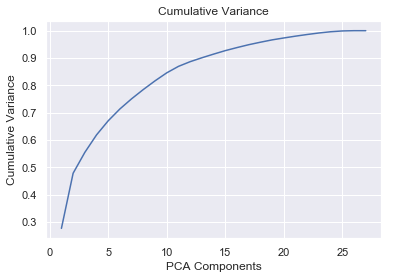

In [431]:
pca_cumvar = np.cumsum(pca.explained_variance_ratio_) 

plt.plot(np.arange(1,len(pca_cumvar)+1), pca_cumvar)
plt.title('Cumulative Variance')
plt.xlabel('PCA Components')
plt.ylabel('Cumulative Variance');

In [432]:
pca80_com = np.argmax(pca_cumvar >= 0.8)+1
pca90_com = np.argmax(pca_cumvar >= 0.9)+1

print('Number of Components to explain 80% Variance: {}'.format(pca80_com))
print('Number of Components to explain 90% Variance: {}'.format(pca90_com))

Number of Components to explain 80% Variance: 9
Number of Components to explain 90% Variance: 13


In [433]:
# 80% variation
pca80 = PCA(n_components=pca80_com).fit(X_train_scaled)
X_train_pca80 = pca80.transform(X_train_scaled)
X_valid_pca80 = pca80.transform(X_valid_scaled)

# 90% variation
pca90 = PCA(n_components=pca90_com).fit(X_train_scaled)
X_train_pca90 = pca90.transform(X_train_scaled)
X_valid_pca90 = pca90.transform(X_valid_scaled)

# fit models
pcr80_mod = LogisticRegressionCV(solver = 'lbfgs', 
                               max_iter = 5000, 
                               cv = 5, 
                               multi_class='multinomial').fit(X_train_pca80, y_train)
pcr90_mod = LogisticRegressionCV(solver = 'lbfgs', 
                               max_iter = 5000, 
                               cv = 5, 
                               multi_class='multinomial').fit(X_train_pca90, y_train)

In [434]:
# test set
# 80% variation
X_test_pca80 = pca80.transform(X_test_scaled)

pcr80_test_pred = [np.where(np.argsort(val) == 1)[0][0]-1 if (i==1) & (np.argmax(val) == 1)
                   else np.argmax(val)-1 for i, val in zip(grp_id, pcr80_mod.predict_proba(X_test_pca80))]

# 90% variation
X_test_pca90 = pca90.transform(X_test_scaled)

pcr90_test_pred = [np.where(np.argsort(val) == 1)[0][0]-1 if (i==1) & (np.argmax(val) == 1)
                   else np.argmax(val)-1 for i, val in zip(grp_id, pcr90_mod.predict_proba(X_test_pca90))]

In [435]:
# 80% variation
score["pcr_80%"] = {}
score["pcr_80%"]["model"] = pcr80_mod
score["pcr_80%"]["Train Score"] = pcr80_mod.score(X_train_pca80, y_train)
score["pcr_80%"]["Validation Score"] = pcr80_mod.score(X_valid_pca80, y_valid)
score["pcr_80%"]["Test Score"] = accuracy_score(y_test, pcr80_test_pred)
print("PCR (80%) Train Score: {}".format(score["pcr_80%"]["Train Score"]))
print("PCR (80%) Validation Score: {}".format(score["pcr_80%"]["Validation Score"]))
print("PCR (80%) Test Score: {}".format(score["pcr_80%"]["Test Score"]))

# 90% variation
score["pcr_90%"] = {}
score["pcr_90%"]["model"] = pcr90_mod
score["pcr_90%"]["Train Score"] = pcr90_mod.score(X_train_pca90, y_train)
score["pcr_90%"]["Validation Score"] = pcr90_mod.score(X_valid_pca90, y_valid)
score["pcr_90%"]["Test Score"] = accuracy_score(y_test, pcr90_test_pred)
print("PCR (90%) Train Score: {}".format(score["pcr_90%"]["Train Score"]))
print("PCR (90%) Validation Score: {}".format(score["pcr_90%"]["Validation Score"]))
print("PCR (90%) Test Score: {}".format(score["pcr_90%"]["Test Score"]))

PCR (80%) Train Score: 0.5075807514831905
PCR (80%) Validation Score: 0.55
PCR (80%) Test Score: 0.65625
PCR (90%) Train Score: 0.5088991430454846
PCR (90%) Validation Score: 0.5342105263157895
PCR (90%) Test Score: 0.6875


Rather than using arbitrary markers for the cumulative percentage of variation captured by our PCA, we can check for the most ideal number of components for our regression as well.

In [436]:
pcr_train_score = []
pcr_valid_score = []
pcr_test_score = []

for i in np.arange(1, X_train.shape[1]):
    pca_cv = PCA(n_components=i).fit(X_train_scaled)
    X_train_pca_cv = pca_cv.transform(X_train_scaled)
    X_valid_pca_cv = pca_cv.transform(X_valid_scaled)
    X_test_pca_cv = pca_cv.transform(X_test_scaled)
    
    pcr_cv_mod = LogisticRegressionCV(solver = 'lbfgs', 
                                      max_iter = 5000, 
                                      cv = 5, 
                                      multi_class='multinomial').fit(X_train_pca_cv, y_train)
    
    pcr_train_score.append(pcr_cv_mod.score(X_train_pca_cv, y_train))
    pcr_valid_score.append(pcr_cv_mod.score(X_valid_pca_cv, y_valid))
    
    pcr_test_score.append(accuracy_score(y_test,
              [np.where(np.argsort(val) == 1)[0][0]-1 if (i==1) & (np.argmax(val) == 1)
               else np.argmax(val)-1 for i, val in zip(grp_id, pcr_cv_mod.predict_proba(X_test_pca_cv))]))
#     pcr_test_score.append(pcr_cv_mod.score(X_test_pca_cv, y_test))

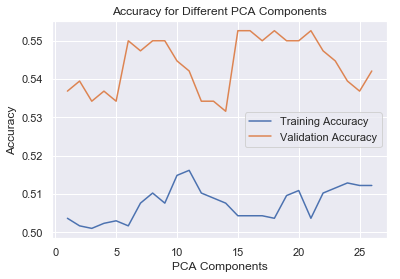

In [437]:
plt.plot(np.arange(1,len(pcr_train_score)+1), pcr_train_score, label='Training Accuracy')
plt.plot(np.arange(1,len(pcr_valid_score)+1), pcr_valid_score, label='Validation Accuracy')


plt.title('Accuracy for Different PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Accuracy')
plt.legend();

In [438]:
# maybe we can do something subsequently to test for all highest validation accuracies
# because np.argmax() randomly picks if there are multiple max
pca_best_com = np.argmax(pcr_valid_score)+1
print('Best Validation Accuracy Number of Components: {}'.format(pca_best_com))

Best Validation Accuracy Number of Components: 15


In [439]:
# best mod with highest validation accuracy
pca_best = PCA(n_components=pca_best_com).fit(X_train_scaled)
X_train_pca_best = pca_best.transform(X_train_scaled)
X_valid_pca_best = pca_best.transform(X_valid_scaled)

# fit models
pcr_best_mod = LogisticRegressionCV(solver = 'lbfgs', 
                                    max_iter = 5000, 
                                    cv = 5, 
                                    multi_class='multinomial').fit(X_train_pca_best, y_train)

In [440]:
# test set
X_test_pca_best = pca_best.transform(X_test_scaled)

pcr_best_test_pred = [np.where(np.argsort(val) == 1)[0][0]-1 if (i==1) & (np.argmax(val) == 1)
                      else np.argmax(val)-1 for i, val in zip(grp_id, pcr_best_mod.predict_proba(X_test_pca_best))]


In [441]:
# Best Validation Accuracy
score["pcr_best"] = {}
score["pcr_best"]["model"] = pcr_best_mod
score["pcr_best"]["Train Score"] = pcr_best_mod.score(X_train_pca_best, y_train)
score["pcr_best"]["Validation Score"] = pcr_best_mod.score(X_valid_pca_best, y_valid)
score["pcr_best"]["Test Score"] = accuracy_score(y_test, pcr_best_test_pred)
print("PCR (Best) Train Score: {}".format(score["pcr_best"]["Train Score"]))
print("PCR (Best) Validation Score: {}".format(score["pcr_best"]["Validation Score"]))
print("PCR (Best) Test Score: {}".format(score["pcr_best"]["Test Score"]))

PCR (Best) Train Score: 0.5042847725774555
PCR (Best) Validation Score: 0.5526315789473685
PCR (Best) Test Score: 0.640625


Note that in this case, the best number of components for our validation set is not the best number of components for our test set.

## Partial Least Square Discriminant Analysis

Extending from PCR, we can try out PLS-DA as well to better account for the variation between predictors in relation to the response variable.

In [442]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)

In [443]:
from sklearn.cross_decomposition import PLSRegression


plsda_train_score = []
plsda_valid_score = []

for i in np.arange(1, X_train.shape[1]):
    plsda_mod = PLSRegression(n_components=i, scale=False) 
    plsda_mod.fit(X_train_scaled, y_train_lb)

    plsda_train_score.append(accuracy_score(y_train, np.argmax(plsda_mod.predict(X_train_scaled), axis=1) - 1))
    plsda_valid_score.append(accuracy_score(y_valid, np.argmax(plsda_mod.predict(X_valid_scaled), axis=1) - 1))

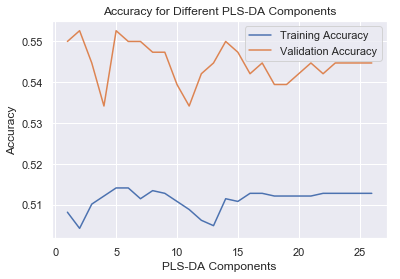

In [444]:
plt.plot(np.arange(1,len(plsda_train_score)+1), plsda_train_score, label='Training Accuracy')
plt.plot(np.arange(1,len(plsda_valid_score)+1), plsda_valid_score, label='Validation Accuracy')

plt.title('Accuracy for Different PLS-DA Components')
plt.xlabel('PLS-DA Components')
plt.ylabel('Accuracy')
plt.legend();

In [445]:
plsda_best_com = np.argmax(plsda_valid_score)+1
print('Best Validation Accuracy Number of Components: {}'.format(plsda_best_com))

Best Validation Accuracy Number of Components: 2


In [446]:
# check test accuracy
plsda_best_mod = PLSRegression(n_components=plsda_best_com, scale=False) 
plsda_best_mod.fit(X_train_scaled, y_train_lb)

plsda_best_test_pred = [np.where(np.argsort(val) == 1)[0][0]-1 if (i==1) & (np.argmax(val) == 1) 
                       else np.argmax(val)-1 for i, val in zip(grp_id, plsda_best_mod.predict(X_test_scaled))]


In [447]:
# Best Validation Accuracy
score["plsda_best"] = {}
score["plsda_best"]["model"] = plsda_best_mod
score["plsda_best"]["Train Score"] = accuracy_score(y_train, np.argmax(plsda_mod.predict(X_train_scaled), axis=1) - 1)
score["plsda_best"]["Validation Score"] = accuracy_score(y_valid, np.argmax(plsda_mod.predict(X_valid_scaled), axis=1) - 1)
score["plsda_best"]["Test Score"] = accuracy_score(y_test, plsda_best_test_pred)
print("PLS-DA (Best) Train Score: {}".format(score["plsda_best"]["Train Score"]))
print("PLS-DA (Best) Validation Score: {}".format(score["plsda_best"]["Validation Score"]))
print("PLS-DA (Best) Test Score: {}".format(score["plsda_best"]["Test Score"]))

PLS-DA (Best) Train Score: 0.5128543177323666
PLS-DA (Best) Validation Score: 0.5447368421052632
PLS-DA (Best) Test Score: 0.65625


In [448]:
plsr_test_score = []

for i in np.arange(1, X_train.shape[1]):
    plsr_mod = PLSRegression(n_components=i, scale=False)
    plsr_mod.fit(X_train_scaled, y_train_lb)
    test_pred = [np.where(np.argsort(val) == 1)[0][0]-1 if (i==1) & (np.argmax(val) == 1) 
                 else np.argmax(val)-1 for i, val in zip(grp_id, plsr_mod.predict(X_test_scaled))]
    plsr_test_score.append(accuracy_score(y_test, test_pred))

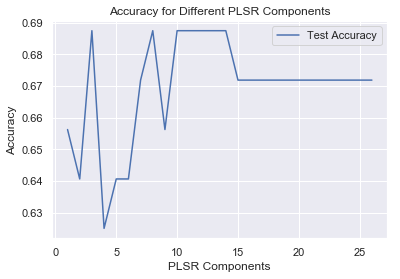

In [449]:
plt.plot(np.arange(1,len(plsr_test_score)+1), plsr_test_score, label='Test Accuracy')

plt.title('Accuracy for Different PLSR Components')
plt.xlabel('PLSR Components')
plt.ylabel('Accuracy')
plt.legend();

Note that the best number of components for our validation set is the best number of components for our test set as well.

## Comparing Results

In [450]:
df_result = pd.DataFrame(score).T

In [451]:
df_result

,Test Score,Train Score,Validation Score,model
Logistic Regression,0.640625,0.512195,0.542105,"LogisticRegressionCV(Cs=10, class_weight=None,..."
LDA,0.640625,0.515491,0.544737,"LinearDiscriminantAnalysis(n_components=None, ..."
QDA,0.5,0.592617,0.428947,"QuadraticDiscriminantAnalysis(priors=None, reg..."
Random Forest,0.59375,0.520765,0.542105,"RandomizedSearchCV(cv=5, error_score='raise',\..."
pcr_full,0.6875,0.512195,0.542105,"LogisticRegressionCV(Cs=10, class_weight=None,..."
pcr_80%,0.65625,0.507581,0.55,"LogisticRegressionCV(Cs=10, class_weight=None,..."
pcr_90%,0.6875,0.508899,0.534211,"LogisticRegressionCV(Cs=10, class_weight=None,..."
pcr_best,0.640625,0.504285,0.552632,"LogisticRegressionCV(Cs=10, class_weight=None,..."
plsda_best,0.65625,0.512854,0.544737,"PLSRegression(copy=True, max_iter=500, n_compo..."


In [452]:
best_mod = df_result['Validation Score'].astype(float).argmax()
print("We choose the final model to be the one with the highest validation score,\
 which is {} in this case".format(best_mod))

We choose the final model to be the one with the highest validation score, which is pcr_best in this case


In [453]:
best_test_score = score[best_mod]['Test Score']
print("For the best Model, {}, the test accuracy is {:.3f}".format(best_mod, best_test_score))

For the best Model, pcr_best, the test accuracy is 0.641
